# 지진해일대피소 현황 분석 및 개선 방안 제시

In [80]:
import pandas as pd 
import folium 
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np

#설치 안된거는 설치해주세요

In [81]:
# 파이그래프에서 한국어 나오게 하는 코드 

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

# 선택한  데이터 
- 전국지진해일대피소표준데이터
    - 통합, 광명시 
- KOSIS 행정구역(시군구)별 인구 통계 데이터 

# EDA

## 서울특별시, 인천광역시, 경기도 데이터만 추출
### 특이사항
- 소재지도로명주소와 소재지지번주소 둘 중 하나만 기입되어 도로명 주소 결측치는 소재지지번주소 컬럼에서 가져옴
- 경기도 광명시 데이터가 몇일 전에 올라와서 따로 다운받아 전국 통합본에 합침

### 과정
1. 주소를 string type으로 변환
2. 띄어쓰기를 기준으로 첫번째 덩어리 ('서울특별시', '인천광역시', '경기도' 등등)만 'area' 컬럼으로 저장 
3. area가 '서울특별시', '인천광역시', '경기도'인건만 새로운 테이블(shelter_GG)로 저장 

In [82]:
shelter_original = pd.read_csv('통합본(1015기준).csv')

FileNotFoundError: [Errno 2] File b'\xed\x86\xb5\xed\x95\xa9\xeb\xb3\xb8(1015\xea\xb8\xb0\xec\xa4\x80).csv' does not exist: b'\xed\x86\xb5\xed\x95\xa9\xeb\xb3\xb8(1015\xea\xb8\xb0\xec\xa4\x80).csv'

In [ ]:
len(shelter_original)

In [ ]:
shelter_original.columns

In [ ]:
out = pd.read_csv('서울특별시 지진해일대피소 정보_20180806.csv', encoding = 'CP949')

In [ ]:
addition = out[(out['관리기관명'] == '용산구')|(out['관리기관명'] == '성동구')|(out['관리기관명'] == '도봉구')|(out['관리기관명'] == '마포구')|(out['관리기관명'] == '구로구')|(out['관리기관명'] == '강동구')|(out['관리기관명'] == '강북구')]

In [ ]:
addition.지진해일대피소유형.unique()

In [ ]:
shelter_original.지진해일대피소유형.unique()

In [ ]:
addition['area'] = '서울특별시'

In [ ]:
addition['area']

In [ ]:
len(addition)

In [ ]:
addition.isnull().sum()

In [ ]:
addition['제공기관명'] = '서울특별시' + ' ' + addition.관리기관명

In [ ]:
addition = addition.reset_index(drop= True)

최대수용인원수가 이상하게 기입된게 있어서 비슷한 수용가능면적을 가진 대피소의 최대수용인원수 평균내 결측치 해결

In [ ]:
addition.iloc[220, 9] = shelter_original[(shelter_original['수용가능면적'] < 7000)&(shelter_original['수용가능면적'] >= 6000)]['최대수용인원수'].mean()

In [ ]:
addition.iloc[81, 9] = shelter_original[(shelter_original['수용가능면적'] < 3000)&(shelter_original['수용가능면적'] >= 2000)]['최대수용인원수'].mean()

In [ ]:
addition.iloc[259, 9] = shelter_original[(shelter_original['수용가능면적'] < 13000)&(shelter_original['수용가능면적'] >= 12000)]['최대수용인원수'].mean()

In [ ]:
addition.iloc[287, 9] = shelter_original[(shelter_original['수용가능면적'] < 3000)&(shelter_original['수용가능면적'] >= 2000)]['최대수용인원수'].mean()

In [ ]:
addition['최대수용인원수'] = addition['최대수용인원수'].astype(float)

In [ ]:
# len(shelter)

In [ ]:
# kwangmyung = pd.read_csv('경기도_광명시_지진해일대피소_20190909.csv', encoding = "CP949")

In [ ]:
# len(kwangmyung)

In [ ]:
# pd.DataFrame(kwangmyung.isnull().sum())

In [ ]:
# kwangmyung['제공기관명'] = '경기도 광명시'

In [ ]:
# dongdaemoon = pd.read_csv('dongdaemoon.csv') # 동대문구 위도, 경도 결측치 채워서 만든 csv

In [ ]:
# dongdaemoon = pd.read_csv('서울특별시_동대문구_지진해일대피소_20190930.csv', encoding = "CP949")

In [ ]:
# pd.DataFrame(dongdaemoon.isnull().sum())

In [ ]:
# dongdaemoon['제공기관명'] = '서울특별시 동대문구'

In [ ]:
# from geocoder import geocode

In [ ]:
# lats = []
# lngs = []

# for i, index in enumerate(dongdaemoon.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(dongdaemoon['소재지도로명주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# dongdaemoon = dongdaemoon.assign(위도=lats, 경도=lngs)

# dongdaemoon.head()

In [ ]:
# dongdaemoon.loc[0, 6:8] = ['37.5760811', '127.0289663']

In [ ]:
# dongdaemoon.loc[20, 6:8] = ['37.574318', '127.0422342']

In [ ]:
# dongdaemoon.to_csv('dongdaemoon.csv')

In [ ]:
# sungbuk = pd.read_csv('서울특별시_성북구_지진해일대피소_20190612.csv', encoding = "CP949")

In [ ]:
# pd.DataFrame(sungbuk.isnull().sum())

In [ ]:
# sungbuk['제공기관명'] = '서울특별시 성북구'

In [ ]:
# shelter = pd.concat([shelter, kwangmyung, dongdaemoon, sungbuk], ignore_index = True, sort = False)

In [ ]:
# shelter.to_csv('통합본(1015기준).csv') 

In [ ]:
shelter_original_seoul = shelter_original[shelter_original['area'] == '서울특별시']

In [ ]:
shelter = pd.concat([shelter_original_seoul, addition], ignore_index = True, sort = False)

In [ ]:
len(shelter)

In [ ]:
shelter.columns

# 위도 경도 결측치 채우기 
 
1. 위도, 경도 결측치인 행만 빼서 하나의 테이블(nulls)로 저장 
    - 정해진 API이용횟수 때문
2. KAKAO API와 LOCATIONIQ API 활용해서 위도 경도 찾음 
3. 두 API로도 안나온 주소지는 손수 찾아서 채움 
4. 본래 통합본에 결측치 테이블(nulls) LEFT JOIN해서 최종 테이블(shelter_G)로 저장
5. 위도, 경도 결측치 남은 것 없는지 확인

In [ ]:
shelter.isnull().sum()

In [ ]:
shelter.head()

In [ ]:
shelter.area.unique()

In [ ]:
seoul = shelter[shelter['area']=='서울특별시']

In [ ]:
seoul.area.unique()

In [ ]:
len(seoul)

In [ ]:
# 컬럼별 null값 찾기
data = seoul.isnull().sum()
pd.DataFrame(data)

In [ ]:
# nulls = shelter_GG[shelter_GG['위도'].isnull()]

In [ ]:
# d= {'a': '백제고분로39길'}
# test = pd.DataFrame(list(d.items()), columns=['alphabet', 'address'])
# test

In [ ]:
# test.index

In [ ]:
# from geocoder import geocode

In [ ]:
# from geocoder import geocode

# full_ad = []

# for i, index in enumerate(test.index):
#     print(i + 1, '-', index)
#     address_name = geocode(test['address'][index])
#     full_ad.append(address_name)
    
# test = test.assign(full=full_ad)

In [ ]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(nulls['소재지도로명주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# nulls = nulls.assign(lat=lats, lng=lngs)

# nulls.head()



In [ ]:
# nulls.to_csv('nulls.csv')

In [ ]:
# import os
# import requests

In [ ]:
# LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [ ]:
# def gc(address):
#     url = 'https://us1.locationiq.com/v1/search.php'
#     payload = {
#         'key': LOCATIONIQ_TOKEN,
#         'q': address,
#         'format': 'json'
#     }
#     response = requests.get(url, params=payload)
#     results = response.json()
#     if 'error' in results:
#         return None, None
#     coordinates = results[0]
#     return coordinates['lat'], coordinates['lon']

In [ ]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = gc(nulls['소재지도로명주소'][index])
#     lats.append(lat or 0)
#     lngs.append(lng or 0)

# nulls = nulls.assign(위=lats, 경=lngs)

# nulls.head()

In [ ]:
nulls = pd.read_csv('nulls.csv')

In [ ]:
nulls.head()

In [ ]:
seoul = seoul.merge(nulls, how='left', on='지진해일대피소명')

In [ ]:
len(seoul) #merge 잘 됐는지 확인 완료

In [ ]:
 #nulls 테이블에 있던 위도 경도 shelter_GG 테이블 위도 경도로 옮기기
seoul['위도'] = seoul['위도'].fillna(seoul['위'])

In [ ]:
seoul['경도'] = seoul['경도'].fillna(seoul['경'])

In [ ]:
pd.DataFrame(seoul.isnull().sum()) #위도, 경도 결측치 다 채운 것 확인완료 

# 분석 시작

## 1. 지진해일대피소유형 분석
- 옥외대피소 vs 실내대피소

옥외대피소만 있는 데이터는 빼고 만든 그래프 

In [ ]:
shelter_original_seoul['지진해일대피소유형'].value_counts()

Text(0, 0.5, '')

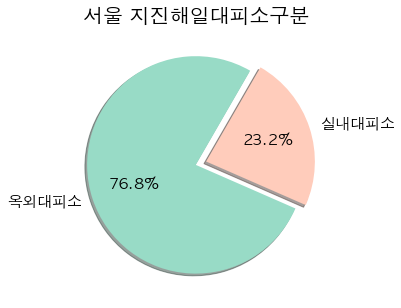

In [83]:
labels=['옥외대피소', '실내대피소']
shelter_original_seoul['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('서울 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

옥외대피소만 있는 데이터 넣고 돌린 그래프

In [84]:
shelter['지진해일대피소유형'].value_counts()

옥외대피소    1503
실내대피소     338
Name: 지진해일대피소유형, dtype: int64

Text(0, 0.5, '')

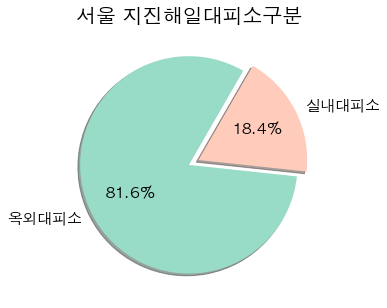

In [85]:
labels=['옥외대피소', '실내대피소']
shelter['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('서울 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

## 2. 내진설계 분석
- 실내 대피소 중 내질설계가 되어있는 대피소는 얼마나 될까?


In [86]:
for_seismic = seoul[seoul['지진해일대피소유형']=='실내대피소']

# 실내 대피소만 내진설계가 가능하기 때문에 실내 대피소만 

In [87]:
seismic_design = len(for_seismic[for_seismic['내진적용여부']=='적용'])/len(for_seismic)*100
print('서울 내진설계 비율 =', seismic_design, '%')

서울 내진설계 비율 = 89.05325443786982 %


Text(0, 0.5, '')

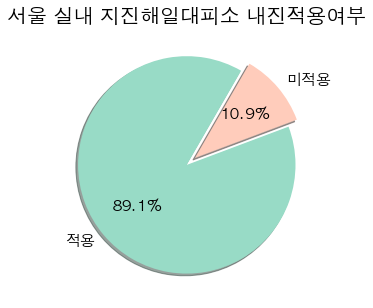

In [88]:
labels=['적용', '미적용']   #항상 파이그래프 보면서 label순서 제대로 설정했는지 확인 
for_seismic['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('서울 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
pylab.ylabel('')    # y축 설명 없애기 

![](bk3)

### 배경지식 
- 실외대피소: 지진 또는 해일이 발생할 경우 실외대피소에서 집합 후 안내 방송에 따라 다같이 이동하기 위한 용도
- 실내대피소: 집합 또는 이재민 수용을 위한 임시주거시설로 이용

![](bk3.png)

Text(0, 0.5, '')

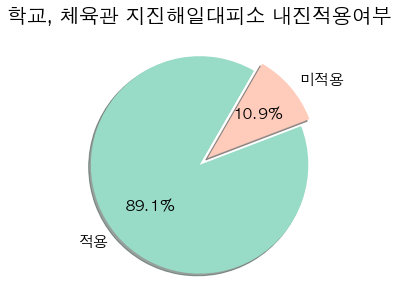

In [89]:
labels=['적용', '미적용']
for_seismic[(for_seismic['지진해일대피소유형구분']=='학교')|(['지진해일대피소유형구분']=='체육관')]['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('학교, 체육관 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
pylab.ylabel('')    # y축 설명 없애기 

## 2. 지진해일 대피소 구분 분석
- 지진해일대피소 vs 지진대피소

In [90]:
seoul['지진해일대피소구분'].value_counts()

지진대피소      1808
지진해일대피소      33
Name: 지진해일대피소구분, dtype: int64

Text(0, 0.5, '')

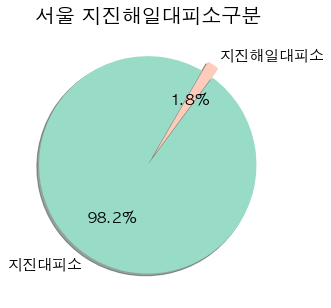

In [91]:
labels=['지진대피소', '지진해일대피소']
seoul['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('서울 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

## 4. 지진해일대피소유형구분 분석

In [92]:
seoul['지진해일대피소유형구분'].value_counts()

학교     616
운동장    586
공원     507
기타     121
체육관     11
Name: 지진해일대피소유형구분, dtype: int64

Text(0, 0.5, '')

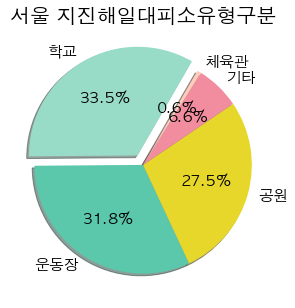

In [93]:
labels=['학교', '운동장', '공원', '기타', '체육관']
seoul['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0,0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('서울 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

## 5. 지진해일대피소운영상태 분석

In [94]:
seoul['지진해일대피소운영상태'].value_counts()

Y    1732
N     109
Name: 지진해일대피소운영상태, dtype: int64

Text(0, 0.5, '')

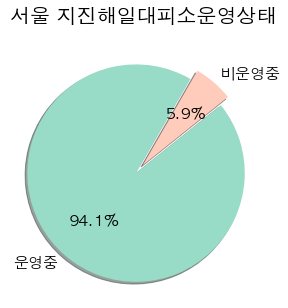

In [95]:
labels=['운영중', '비운영중']
seoul['지진해일대피소운영상태'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('서울 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

## 7. 지역별 대피소 지도 만들기 
- 처음에는 전국 데이터를 한번에 찍어보려 했으나 데이터가 너무 많아 지도가 뜨지 않음 
- 8도로 나누어 시도 -> 서울, 인천, 경기 3곳 모두 데이터 양이 많아 지도 안뜸 
    - 데이터 양의 문제가 아니였음
    - 타일 옵션인 Mapbox Bright가 더이상 지원되지 않아서 생겼던 문제

### 경도, 위도 입력 잘못되어 있는 곳 
- 계양교통공원 
- 서울용곡중학교 (실내, 실외)
- 대방공원 

## 경도, 위도 잘못 입력된 곳 정보 수정

In [96]:
seoul[seoul['지진해일대피소명'] == '대방공원']

,Unnamed: 0,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,...,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,Unnamed: 0.1,area,위,경
114,915.0,대방공원,지진대피소,옥외대피소,공원,서울특별시 동작구 대방동23-176,NaN,37.5102,128.929,10656,...,동작구청 안전재난담당관,02-820-9201,2019-07-04,3190000.0,서울특별시 동작구,NaN,NaN,서울특별시,NaN,NaN


In [97]:
# 서울용곡중학교 정보 수정
seoul.iloc[765, 6] = 37.5660646
seoul.iloc[765, 7] = 127.0866867

seoul.iloc[777, 6] = 37.5660646
seoul.iloc[777, 7] = 127.0866867

In [98]:
# 대방공원 정보 수정 
seoul.iloc[114, 6] = 37.5100726
seoul.iloc[114, 7] = 126.9264025

## 서울 지도

In [99]:
map = folium.Map(location=[37.5650172, 126.849465], zoom_start = 10)
fg = folium.FeatureGroup(name = '서울지진해일대피소')
for lat, lon, name in zip(seoul['위도'], seoul['경도'], seoul['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'star', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='빅데이터 캠퍼스 서울.html')

## 8. 지역별 인구수 대비 최대수용가능 인원수 비교

- 서울, 인천: 구 단위
- 경기도: 시 단위 
- (인구 통계가 위와 같은 단위로 분리되어있기 때문)

### 과정
1. KOSIS에서 서울, 인천, 경기도 인구 통계 불러옴 

2. 서울특별시, 인천광역시, 경기도 행 제거 (각 구 또는 시 인구 수의 합)

3. 서울 중구, 인천 중구 합쳐지는 문제 발생 
    - 인구 통계 테이블을 각 지역별로 분리하여 따로 저장 
    - 구 또는 시 이름 앞 '서울특별시', '인천광역시', '경기도' 붙여줌 
    - 다시 하나의 테이블로 합침

4. 인구 통계 테이블의 지역명과 대피소 테이블의 '제공기관명'과 분류가 동일해 '제공기관명'을 기준으로 LEFT JOIN 
    - 인구 통계 테이블에는 있지만 대피소 테이블에는 없는 지역 (=대피소 데이터가 없는 지역) 찾음 
    - 공공데이터 포털에 데이터 요청 
    - 국민재난안전포털에서 데이터 긁어옴

5. 제공기관명(지역명)으로 groupby한 후, 최대수용인원수를 sum 해서 지역별 최대수용인원수 컬럼 생성 

6. '지역 인구수 - 지역 최대수용인원수'를 'diff'컬럼에 저장 

7. diff가 마이너스면 '불충분', 플러스면 '충분'으로 지정


### 데이터 없는 지역 
- 서울특별시 용산구 (곧 받을 예정)
- 서울특별시 성동구
- 서울특별시 동대문구 (O)
- 서울특별시 성북구(O)
- 서울특별시 도봉구
- 서울특별시 마포구
- 서울특별시 구로구
- 서울특별시 강동구
- 서울특별시 강북구
- 경기도 용인시
- 경기도 안양시
- 경기도 연천군

In [100]:
ppl = pd.read_csv('population.csv', encoding = "CP949")

# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3

FileNotFoundError: [Errno 2] File b'population.csv' does not exist: b'population.csv'

In [ ]:
ppl.head()

In [ ]:
len(ppl)

In [ ]:
ppl = ppl.loc[:26, :]

In [ ]:
ppl.tail()

In [ ]:
ppl[(ppl['행정구역(시군구)별']=='행정구역(시군구)별')|(ppl['행정구역(시군구)별']=='서울특별시')]

In [ ]:
ppl = ppl.drop([ppl.index[0], ppl.index[1]])

In [ ]:
ppl

In [ ]:
# 분석 쉽도로 컬럼명 변경 
ppl = ppl.rename(columns={'행정구역(시군구)별': 'sigungu', '2019. 09': 'nop'}) #nop: number of people

In [ ]:
# 서울 구 이름 앞에 서울특별시 붙여넣기
ppl['sigungu'] = '서울특별시' + ' ' + ppl.sigungu.str[0:] #future warning 무시 -> 해결방법을 찾아야하지만....ㅎ 

In [ ]:
ppl

In [ ]:
# 제공기관명이 시이름 + 구이름 으로 되어 있어서 이 컬럼을 기준으로 join 할 예정
seoul.제공기관명.unique()

In [ ]:
seoul.최대수용인원수 = seoul.최대수용인원수.astype(float)

In [ ]:
# 인구테이블과 join하기 위해 필요한 두개 컬럼만 shelter_ppl이라는 테이블로 저장
shelter_ppl = seoul[['최대수용인원수', '제공기관명']]

In [ ]:
# 제공기관명으로 groupby해서 그 지역 내 모든 대피소 최대수용인원수 더하기
shelter_capacity_temp= pd.DataFrame(shelter_ppl.groupby('제공기관명')['최대수용인원수'].sum())

In [ ]:
shelter_capacity_temp

In [ ]:
find_missing_area = ppl.merge(shelter_capacity_temp, how='left', left_on=['sigungu'], right_on=['제공기관명'])

In [ ]:
find_missing_area[find_missing_area['최대수용인원수'].isnull()] #뭐죠? 왜죠? 왜 없죠?

In [ ]:
# join 하기
shelter_capacity = shelter_capacity_temp.merge(ppl, how='left', left_on=['제공기관명'], right_on=['sigungu'])

In [ ]:
shelter_capacity

In [ ]:
shelter_capacity.columns

In [ ]:
shelter_capacity.sample(10)

In [ ]:
# 분석 용이하게 하기 위해 컬럼명 변경 
shelter_capacity.rename(columns={'최대수용인원수':'max'}, inplace=True)

In [ ]:
len(shelter_capacity)

In [ ]:
# max 컬럼이 float64이기때문에 정확한 비교를 위해 타입 변경
shelter_capacity['nop'] = shelter_capacity['nop'].astype('float64')

In [ ]:
shelter_capacity['max'] = shelter_capacity['max'].astype('float64')

In [ ]:
shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']]

In [ ]:
# 두 컬럼의 차를 diff 컬럼에 저장
shelter_capacity['diff'] = shelter_capacity['max']-shelter_capacity['nop']

In [ ]:
shelter_capacity['diff'].max()

In [ ]:
shelter_capacity['diff'].min()

In [ ]:
# 값이 마이너스면 불충분, 플러스면 충분으로 지정
shelter_capacity['capacity'] = shelter_capacity['diff'].apply(lambda x: '불충분' if x<0 else '충분' )

In [ ]:
len(shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']])

In [ ]:
shelter_capacity.sort_values('nop', ascending = False).head(5)

In [ ]:
shelter_capacity.sort_values('nop').head(5)

In [ ]:
shelter_capacity.sort_values('max', ascending = False).head(5)

In [ ]:
shelter_capacity.sort_values('max').head(5)

In [ ]:
line_chart1 = plt.plot(shelter_capacity['nop'])
line_chart2 = plt.plot(shelter_capacity['max'])
plt.title('인구수 대비 지역내 대피소 최대수용인원')
plt.xlabel('시군')
plt.ylabel('인구수')
plt.legend(['지역인구수', '최대수용인원수'], loc = 1)
plt.show()

In [ ]:
shelter_capacity['capacity'].value_counts()

In [ ]:
labels=['불충분', '충분']
shelter_capacity['capacity'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('인구수 대비 지역내 대피소 최대수용인원', fontsize=20)
pylab.ylabel('')

## 트러블 슈팅 
- 지진해일대피소 데이터가 없는 시, 구가 있다 	
    - 공공데이터 포털에 요청 
    - 국민재난안전포탈에서 끌어옴 
- 인천 중구, 서울 중구, 경기도 광주, 광주광역시와 같이 지역명 혼동 
    - 구 이름 앞에 시 이름을 붙여 구분 후 분석
- API로 위도 경도 결측치 채우기 
    - KAKAO, LacationIQ 둘다 해도 안나오는 데이터 있음 	
        - 노가다로 채움 
- 서울, 인천, 경기 각 지역 대피소 수가 많아서 지도가 안돌아감
    - 방법이 필요
- 세종시 데이터에는 중복 데이터가 있음
    - 중복 데이터 확인 후 제거 
    - 중복 이유 문의 예정 
- 주소를 검색해봤는데 밭이 나온다 
    - 미해결

### 역할분배
- 지역별로 나누어 분석중 


### 앞으로 더 해볼 것 (hopes & dreams)
- 대피소에서 더 나아가 '행정안전부_이재민임시주거시설정보'데이터를 분석하여 실내대피소와 임시주거시설 비교
- 인구수 대비 최대수용인원 부족하면 색깔이 진하게 히트맵으로 시각화하여 문제가 심각한 지역 찾기
- 지진 데이터를 보며 지진이 자주 일어나는 지역을 찾아보고 집중 분석 
- 지진대피소와 지진해일대피소의 구분 등 더 많은 배경지식 조사
- 구 또는 시 단위가 아닌 동 단위로 인구 수 대비 최대수용가능 인원수 분석 
- 개선 방안 모색 
     - 대피소 불충분 지역에 대피소를 증축한다면 위치 최적화 (입지 분석) -- 현실가능성....?
     - 현재 위치 기반 최단거리 대피소 추천 
     - 재난 위치에 따른 대피소 추천 
- 10월 18일 마감인 '서울특별시 빅데이터 캠퍼스 공모전' 준비 

### 동기 & 선미님께 받고 싶은 도움 
- 데이터가 많아서 지도가 안돌아가는데 어떡하나요? 
- 최적 위치 선정을 하고 싶은데 도움이 될만한 강의 또는 글이 있을까요?
- 데이터가 없는 지역 데이터 요청했는데 이유도 안말해주고 거절당했어요....안전처에서 재난소 위치는 가져올수 있지만 데이터가 많이 부족한데 이거 어떻게 하면 좋을까요?
- 주소가 잘못된 데이터는 빼는게 좋을까요?
- 피드백 주세요~~

In [101]:
shelter_capacity['gu']=shelter_capacity['sigungu'].str.split(' ').str[1]
shelter_capacity['diff_map'] = shelter_capacity['nop']-shelter_capacity['max']


import json
import matplotlib.pyplot as plt

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='stamentoner')
map.choropleth(geo_data=geo_str,
              data=shelter_capacity, #내가 원하는 데이터를 넣어주세요 
              columns=['gu', 'diff_map'], #앞에는 인덱스, 뒤에는 data에 있는 정보를 그대로 넣어주세요 
              fill_color='YlOrRd',
              key_on='feature.properties.name')
map
# map.save('구 단위 인구 대비 최대수용인원수 시각화.html')

/usr/local/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# table = pd.read_csv('상권배후지-추정유동인구(2019년).csv', encoding = "CP949")

## 지진 대피소 위치

In [ ]:
seoul.shape

In [ ]:
# null값이 있으면 folium을 사용할 수 없어서 null값을 0으로 바꿔주기
seoul['위도'] = seoul['위도'].replace(np.nan, 0, regex = True)
seoul['경도'] = seoul['경도'].replace(np.nan, 0, regex = True)

In [ ]:
# 데이터의 크기를 줄이기 위해 위도, 경도 칼럼만 추출
coordinates = seoul[['위도', '경도']]

In [ ]:
coordinates.head()

In [ ]:
# null값 확인
coordinates.isnull().sum()

### 대피소 위치

In [ ]:
from folium import Map

In [ ]:
# 지도 준비

map = Map(location=[37.55, 127], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=100,
        weight=1,
#         fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

### 30분 이내 도착 수용가능 범위

In [ ]:
# 지도 준비

map = Map(location=[37.55, 127], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=2_250,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 255)',
        fill_color='rgb(0, 0, 255)',
        fill_opacity=0.01,
    )
    marker.add_to(map)

map

## 10분 이내 도착 수용가능 범위

In [ ]:
# 지도 준비

map = Map(location=[37.55, 127], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=750,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 255)',
        fill_color='rgb(0, 0, 255)',
        fill_opacity=0.1,
    )
    marker.add_to(map)

map

## 인구대비 수용인원이 많은 대피소는 더 많은 사람에게 추천할 수 있지 않을까?
#### 필요한 데이터
1. 인구 수 데이터
 - 거주인구
 - 유동인구
 - 둘 중 어느 데이터로 할 것인가? 둘 다 사용?
2. 서울시 지진 대피소 데이터

#### 방법
1. 인구대비 수용인원이 많은 지역을 찾는다.
 - 한솔님 분석해주신 거주인구 최대 수용인원 이용
 - 예은님께 유동인구 데이터를 받아서 한솔님 코드에 적용
2. 수용인원 '충분' 단계 기준을 정한다. (4단계)
 - 1(매우충분), 2(충분), 3(부족), 4(매우부족)
3. '충분' 단계의 대피소 알림 기준을 어디까지 확대할지 정한다.
 - 750m(10분이내) ~ 2250m(30분이내)에서 거리를 설정?
 - 30분 이상 걸리는 거리도 추가로 설정?

In [ ]:
shelter_capacity['diff'].max()

In [ ]:
shelter_capacity['diff'].min()

In [ ]:
# 불충분, 충분으로 나눴던 capacity를 4단계로 세분화

In [ ]:
seoul_level = seoul.merge(shelter_capacity, how='left', left_on=['제공기관명'], right_on=['sigungu'])

In [ ]:
# 1(매우충분) : diff >= 100000
# 2(충분) : 0 <= diff < 100000
# 3(부족) : -300000 <= diff < 0
# 4(매우부족) : diff < -300000
seoul_level['level'] = seoul_level['diff'].apply(lambda x:'1' if x>= 100000 else 
                                                           ('2' if x>=0 else
                                                            ('3' if x>=-300000 else '4')))

In [ ]:
shelter_1 = seoul_level[seoul_level['level'] == '1']
shelter_2 = seoul_level[seoul_level['level'] == '2']
shelter_3 = seoul_level[seoul_level['level'] == '3']
shelter_4 = seoul_level[seoul_level['level'] == '4']

In [ ]:
coordinates_1 = shelter_1[['위도', '경도']]
coordinates_2 = shelter_2[['위도', '경도']]
coordinates_3 = shelter_3[['위도', '경도']]
coordinates_4 = shelter_4[['위도', '경도']]

### 750 ~ 2250m 내에서 범위를 수정한다고 가정했을때

level 1 : 2250m  
level 2 : 1750m  
level 3 : 1250m  
level 4 : 750m

In [ ]:
# 지도 준비

map = Map(location=[37.55, 127], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates_1.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=2_250,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 0)',
        fill_color='rgb(255, 128, 114)',
        fill_opacity=0.1,
    )
    marker.add_to(map)
    
for lat, lng in coordinates_2.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_750,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 0)',
        fill_color='rgb(240, 230, 140)',
        fill_opacity=0.1,
    )
    marker.add_to(map)
    
for lat, lng in coordinates_3.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_250,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 0)',
        fill_color='rgb(132, 178, 170)',
        fill_opacity=0.1,
    )
    marker.add_to(map)
    
for lat, lng in coordinates_4.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=750,
        weight=1,
        opacity=0.1,
        color = 'rgb(0, 0, 0)',
        fill_color='rgb(135, 206, 250)',
        fill_opacity=0.1,
    )
    marker.add_to(map)

map